# STROKE PREDICTION AMONGST ADULTS OVER 30 YEARS OLD
---
### This project shows the likelihood of getting a stroke for adults over the age of 30
DSAI Project by EL01 group 7<br>
Members: AARON TANG JUN JIe, AHMADUL MATIN BIN AHMAD KAMAL, HO XIN ZHEN, IGNATIUS TANG HONG-QUAN<br>
Dataset from Kaggle: Stroke Prediction Dataset by FEDESORIANO<br>
Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

---
### Setup: Importing the Dataset

In [1]:
!pip install -U imbalanced-learn
# importing libraries
#Creating modeling dataset
from sklearn.datasets import make_classification

#Data processing
import numpy as np
import pandas as pd

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sb

#Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score

#Over samepling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
strokeData = pd.read_csv('stroke.csv')
strokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Preparation

In [3]:
#Convert smoking status to categorical data
strokeData['smoking_status'] = strokeData['smoking_status'].astype('category')

Extract specific variables from Stroke Dataset.

In [4]:
strokeData = pd.DataFrame(strokeData[['age', 'avg_glucose_level', 'bmi', 'smoking_status','stroke']])
strokeData

,age,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,228.69,36.6,formerly smoked,1
1,61.0,202.21,NaN,never smoked,1
2,80.0,105.92,32.5,never smoked,1
3,49.0,171.23,34.4,smokes,1
4,79.0,174.12,24.0,never smoked,1
...,...,...,...,...,...
5105,80.0,83.75,NaN,never smoked,0
5106,81.0,125.20,40.0,never smoked,0
5107,35.0,82.99,30.6,never smoked,0
5108,51.0,166.29,25.6,formerly smoked,0


In [5]:
#Dropping the unusual category from the dataset
strokeData.drop(strokeData.loc[strokeData['smoking_status']=='Unknown'].index, inplace=True)
strokeData.shape

#Drop entries with age < 30
strokeData.drop(strokeData.loc[strokeData['age'] < 30].index, inplace=True)
strokeData.shape

#Resetting the index after removing the unusual category
strokeData.reset_index(drop=True)

,age,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,228.69,36.6,formerly smoked,1
1,61.0,202.21,NaN,never smoked,1
2,80.0,105.92,32.5,never smoked,1
3,49.0,171.23,34.4,smokes,1
4,79.0,174.12,24.0,never smoked,1
...,...,...,...,...,...
2894,57.0,77.93,21.7,never smoked,0
2895,80.0,83.75,NaN,never smoked,0
2896,81.0,125.20,40.0,never smoked,0
2897,35.0,82.99,30.6,never smoked,0


In [6]:
#Checking for duplicates in the dataset
display("Total number of of Duplicates present in data: %s" %strokeData.duplicated().sum())

#Checking for missing values in the dataset
print("Number of Missing Values in our data set\n")
missing_data = strokeData.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

'Total number of of Duplicates present in data: 0'

Number of Missing Values in our data set



,Variable,Missing Values
0,age,0
1,avg_glucose_level,0
2,bmi,125
3,smoking_status,0
4,stroke,0


We will use `mean` to fill up missing values in Numerical Continuous columns(`bmi`)

In [7]:
strokeData['bmi'].fillna(strokeData['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(strokeData.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,age,0
1,avg_glucose_level,0
2,bmi,0
3,smoking_status,0
4,stroke,0


In [8]:
#Check for zero values in the 3 extracted numeric variables
strokeData[strokeData['age']==0]
strokeData[strokeData['avg_glucose_level']==0]
strokeData[strokeData['bmi']==0]

,age,avg_glucose_level,bmi,smoking_status,stroke


---
### Check the Variables Independently

Summary Statistics of `strokeData`.     
`age`, `avg_glucose_level`, `bmi` <br>
Followed by Statistical Visualizations on the variables. 

In [9]:
strokeData.describe()

,age,avg_glucose_level,bmi,stroke
count,2899.000000,2899.000000,2899.000000,2899.000000
mean,55.185581,112.085892,30.966799,0.069679
std,14.754024,51.083208,6.944066,0.254650
min,30.000000,55.220000,11.500000,0.000000
25%,43.000000,77.940000,26.400000,0.000000
50%,54.000000,93.550000,30.200000,0.000000
75%,67.000000,121.230000,34.400000,0.000000
max,82.000000,271.740000,92.000000,1.000000


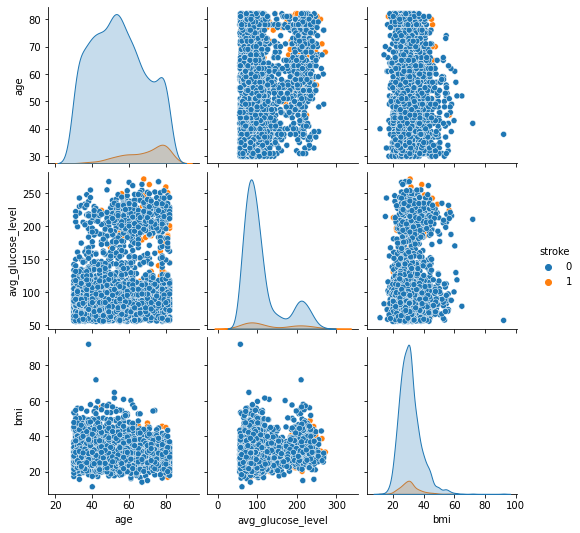

In [10]:
#Checking the relationship between variables of data using pairplot
sb.pairplot(strokeData,diag_kind="kde",hue="stroke")

Check the `catplot` for `stroke`, to visually understand the distribution.


In [11]:
#Checking if the dataset is balanced or not
strokeData.stroke.value_counts()

0    2697
1     202
Name: stroke, dtype: int64

Text(0, 0.5, 'Count')

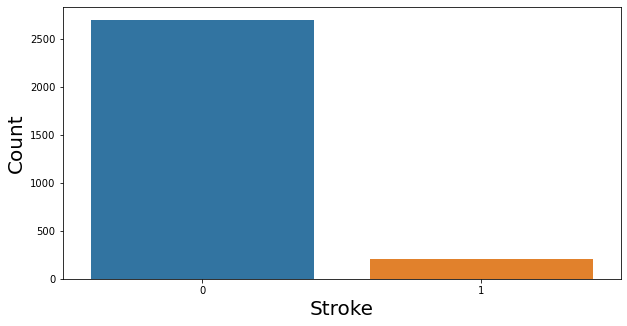

In [12]:
stroke_label = strokeData.stroke.value_counts()
plt.figure(figsize=(10, 5))
sb.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(strokeData['stroke'])
X = pd.DataFrame(strokeData['age'])

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training dataset is', X_train.shape[0])
print('Test dataset is', X_test.shape[0])

Training dataset is 2319
Test dataset is 580


In [14]:
#Train the random forest model
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)

#Check the model performace
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       542
           1       0.00      0.00      0.00        38

    accuracy                           0.93       580
   macro avg       0.47      0.50      0.48       580
weighted avg       0.87      0.93      0.90       580



### Implement random oversampling to balance the class distribution

In [15]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = strokeData[strokeData.stroke==0]
df_2 = strokeData[strokeData.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

df_upsampled.reset_index(drop=True)

,age,avg_glucose_level,bmi,smoking_status,stroke
0,58.0,87.96,39.2,never smoked,0
1,70.0,69.04,35.9,formerly smoked,0
2,52.0,77.59,17.7,formerly smoked,0
3,75.0,243.53,27.0,never smoked,0
4,32.0,77.67,32.3,smokes,0
...,...,...,...,...,...
6056,70.0,239.07,26.1,never smoked,1
6057,57.0,67.41,32.9,never smoked,1
6058,78.0,116.10,27.1,never smoked,1
6059,59.0,86.23,30.0,formerly smoked,1


Text(0, 0.5, 'Count')

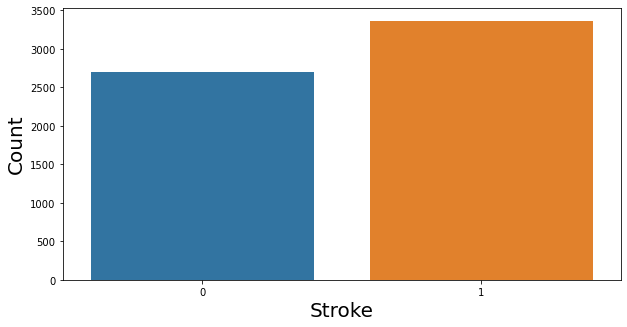

In [16]:
stroke_label = df_upsampled.stroke.value_counts()
plt.figure(figsize=(10, 5))
sb.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

Now the Dataset is balanced.

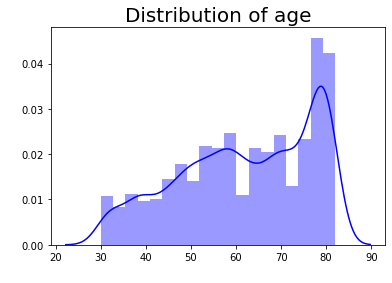

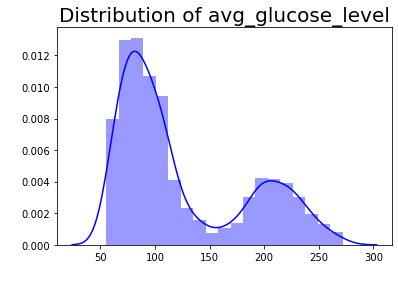

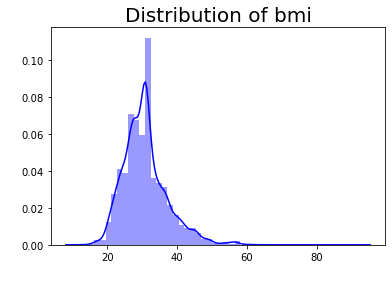

In [17]:
numerical = strokeData[['age', 'avg_glucose_level', 'bmi']]
for i in numerical:
   
    ax = sb.distplot(df_upsampled[i], color = 'blue')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 10)
    plt.show();
    print('\n')

In [18]:
#Creating a function for ordering the groups in a column as per their frequency
def sort_order(column):
    orders = (df_upsampled.groupby([column]).mean().sort_values(by ='stroke', ascending = False)).index
    return orders

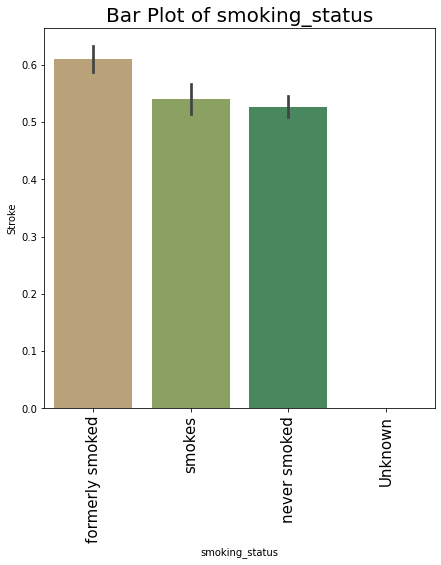

In [19]:
#Bar Plot of smoking staus against stroke 
smokeData = pd.DataFrame(strokeData['smoking_status'])
for i in smokeData:
    
    f,ax=plt.subplots(figsize=(7,7))
    sb.barplot(df_upsampled[i],df_upsampled['stroke'], order = sort_order(i), palette='gist_earth_r')
    plt.title("Bar Plot of %s" %i, fontsize = 20)
    plt.xticks(fontsize = 12)
    plt.xlabel("%s"%i)
    plt.ylabel("Stroke")
    plt.xticks(fontsize = 15, rotation = 90)
    plt.show();
    print('\n')

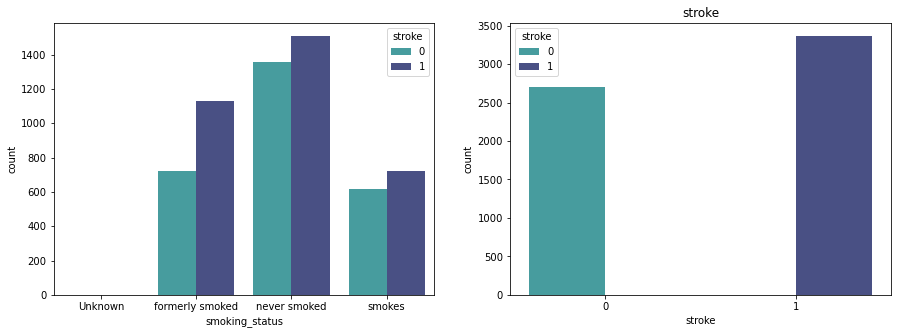

In [20]:
df_st=['smoking_status','stroke']
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
     
     sb.countplot(x=col_name, data=df_upsampled, ax=axs[i], hue =df_upsampled['stroke'],palette='mako_r')
     #ax.set_title(col_name, fontdict={'fontsize': 10},fontweight ='bold')
     plt.title(col_name)

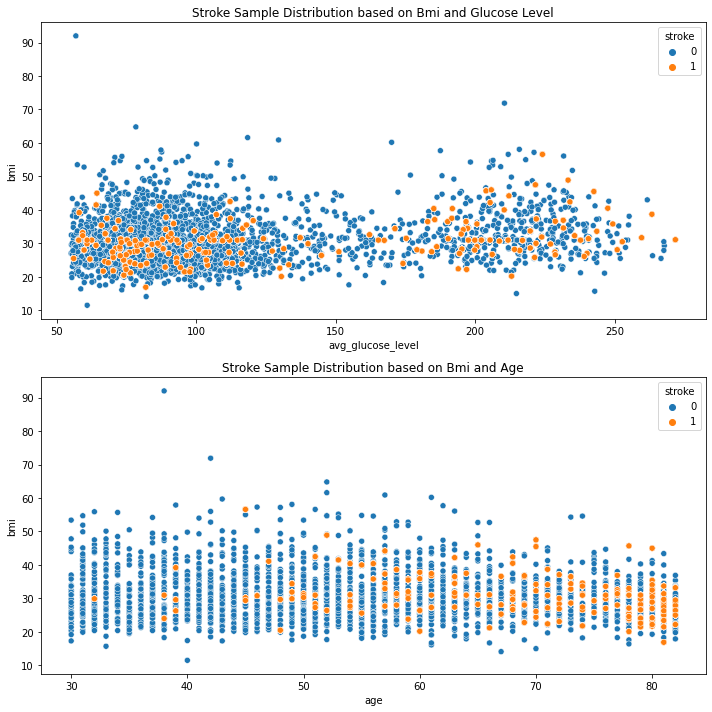

In [21]:
fig=plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)

plt.title('Stroke Sample Distribution based on Bmi and Glucose Level')
sb.scatterplot(x=df_upsampled['avg_glucose_level'],y=df_upsampled['bmi'],hue=df_upsampled['stroke'])
plt.subplot(2,1,2)

plt.title('Stroke Sample Distribution based on Bmi and Age')
sb.scatterplot(x=df_upsampled['age'],y=df_upsampled['bmi'],hue=df_upsampled['stroke'])
plt.tight_layout()
plt.show()


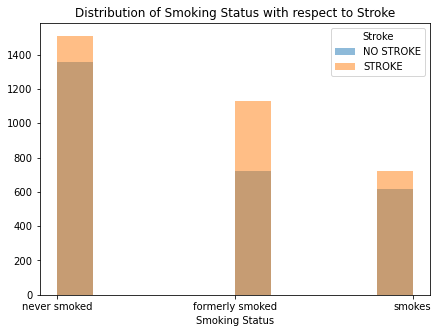

In [22]:
#Distribution of Smoking Status with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] == 0], alpha = 0.5, label = "NO STROKE")
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Smoking Status with respect to Stroke")
plt.xlabel("Smoking Status")
plt.legend(title = "Stroke")
plt.show()

This dataset has more number of sampels of people who does not smoke. This graph shoes that stroke tendency is high if a person smokes.

### Correlation Matrix

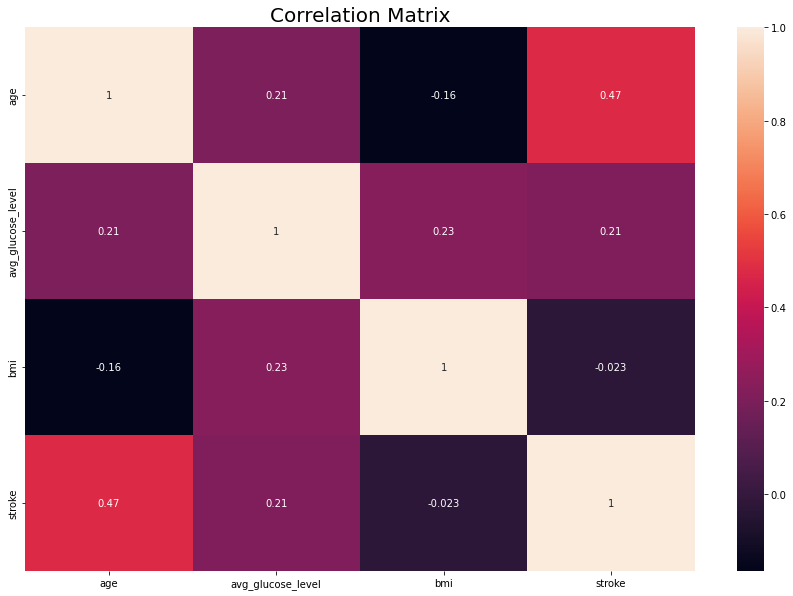

In [23]:
#checking correlation between the variables
plt.figure(figsize=(15, 10))
sb.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

From the heat map above, it seems that `age` and `avg_glucose_level` are important variables and there is no multicollinearity.

In [24]:
#Sorting feature according to their importance
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.473876
avg_glucose_level    0.210852
bmi                 -0.023285
Name: stroke, dtype: float64

---
## Outlier Analysis and Removal

In [25]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [26]:
#Checking how outlier removal affected dataset
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2697
dtype: int64

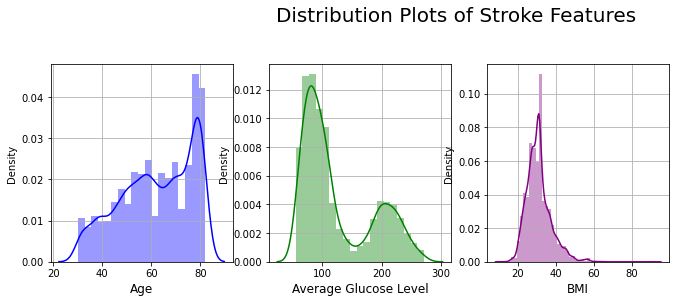

In [27]:
#Distribution for important Stroke Features before removing ouliers
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sb.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sb.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sb.distplot(df_upsampled['bmi'],color = 'purple')
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

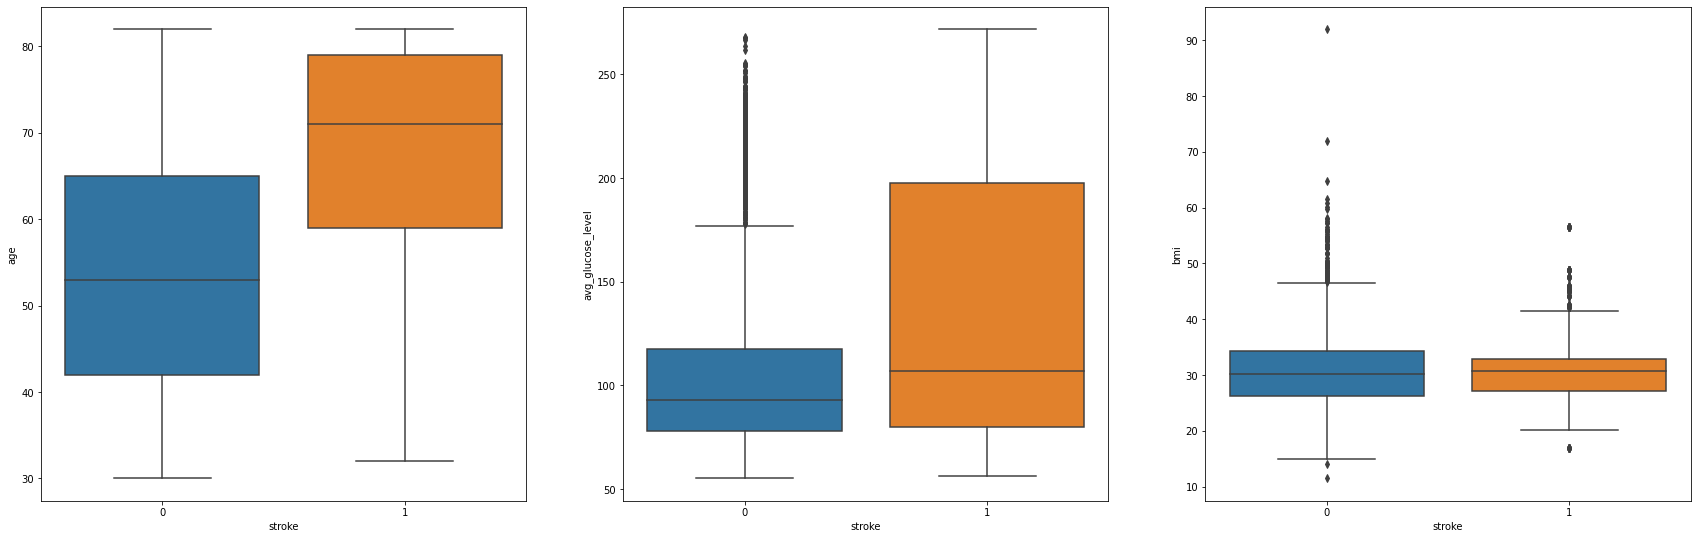

In [28]:
#Checking the outliers considering all classes of the output for each numerical column using Boxplot
def graph(y):
    sb.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [29]:
#Dropping 'avg_glucose_level' outliers for non-stroke
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

#Dropping 'avg_glucose_level' outliers for stroke
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
0    2288
1    2091
dtype: int64

In [30]:
#Dropping 'bmi' outliers for non-stroke
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

#Dropping 'bmi' outliers for stroke
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
0    2015
1    1990
dtype: int64

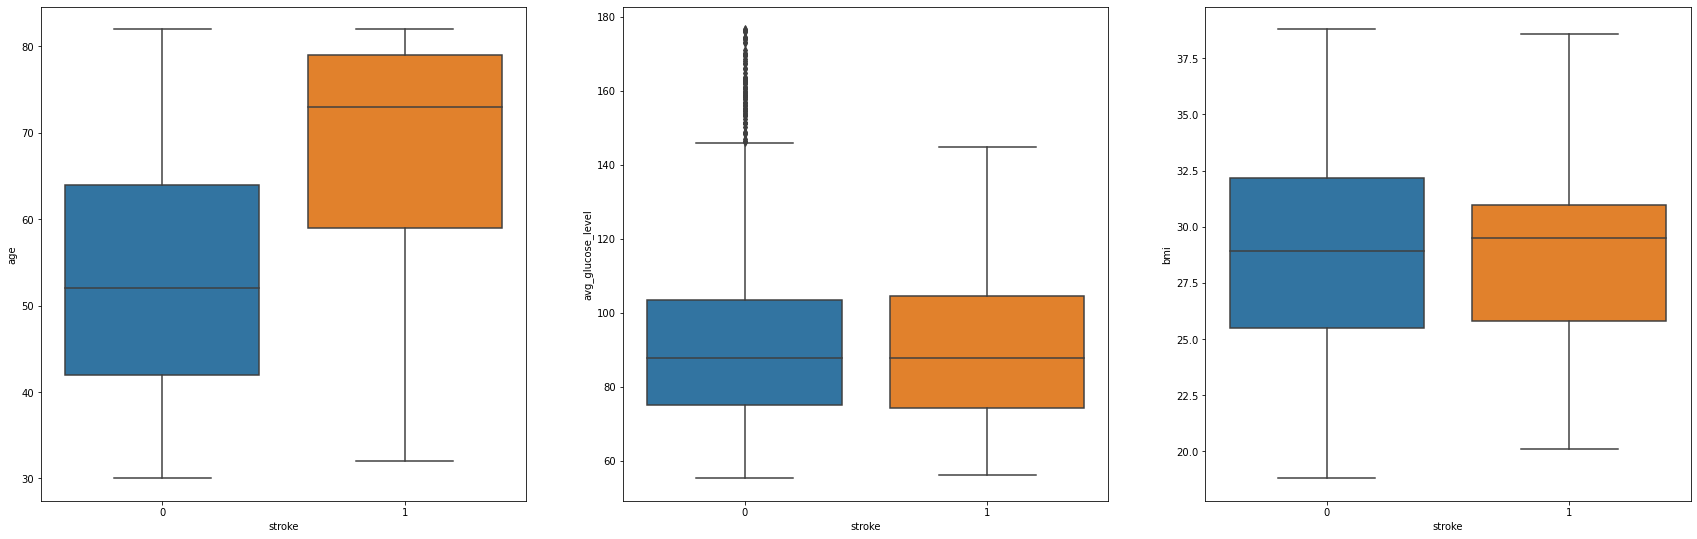

In [31]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sb.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [32]:
#Drop outliers again for 'avg_glucose_level' = 0
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

#Drop outliers again for 'bmi' = 1
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    1990
0    1938
dtype: int64

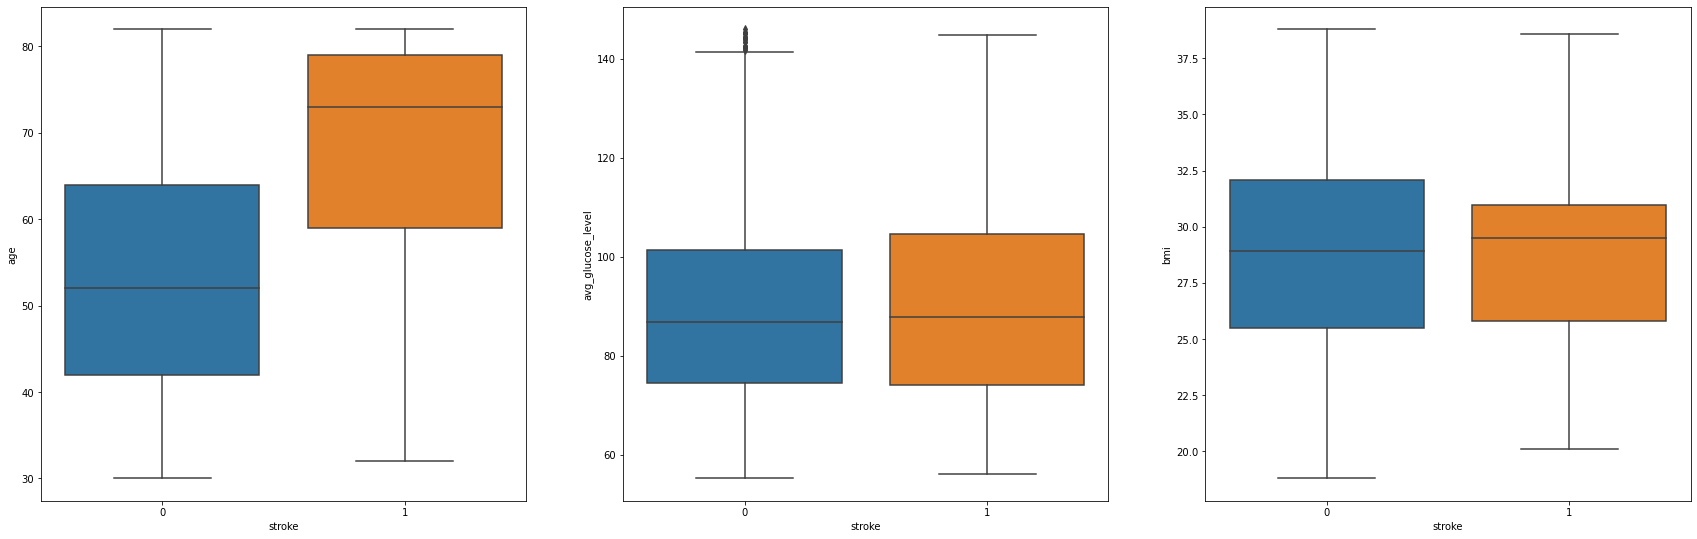

In [33]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sb.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

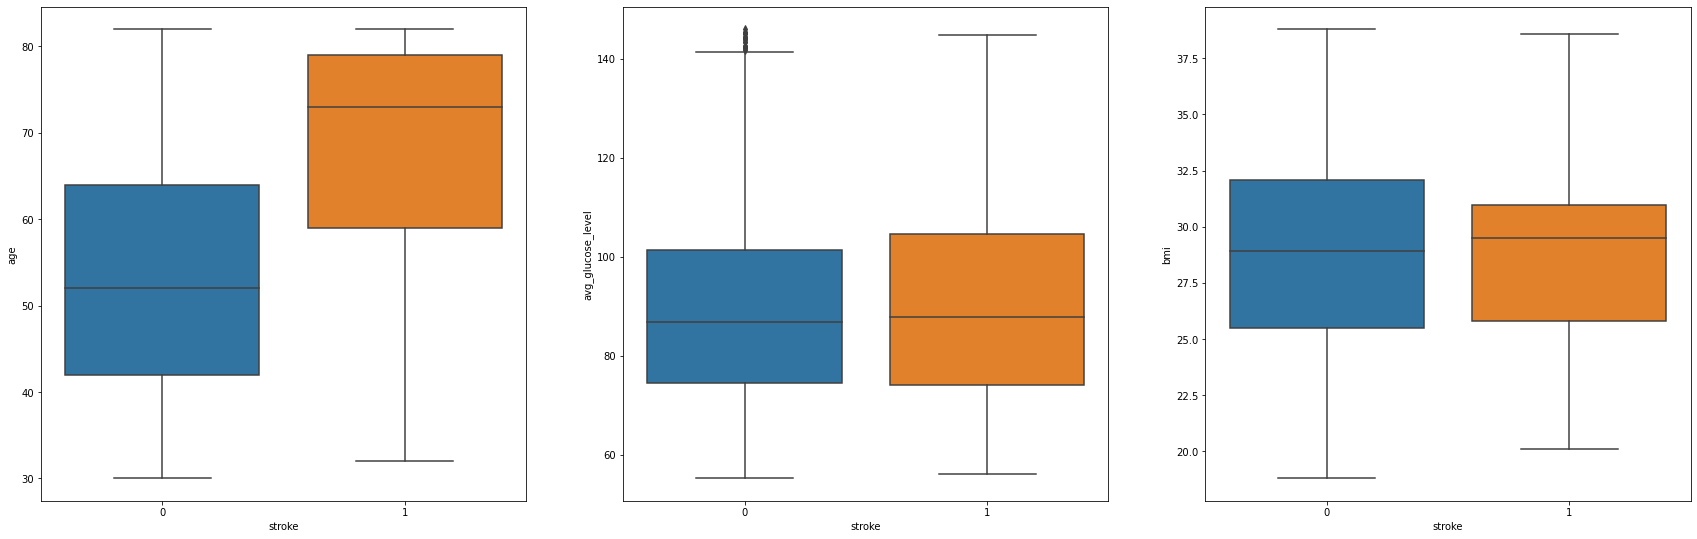

In [34]:
#Boxplot of variables after outliers are dropped
def graph(y):
    sb.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

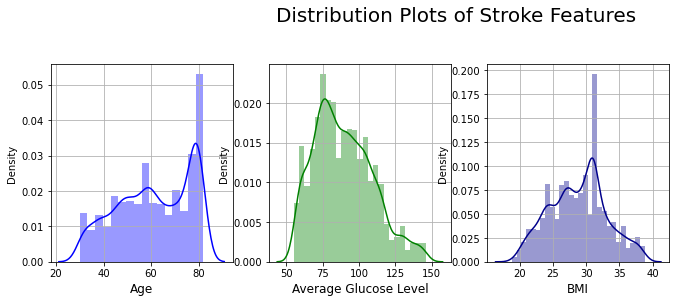

In [35]:
#Distribution for important Stroke Features after outlier removal
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sb.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sb.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sb.distplot(df_upsampled['bmi'],color = 'darkblue')
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

After the removal of abnoamlies and outliers, the distribution of columns for the respective graphs are less skewed and forms sort of a bell-shaped curve.

In [36]:
#Resetting the index after outlier removal
df_upsampled.reset_index(drop=True,inplace=True)
df_upsampled

,age,avg_glucose_level,bmi,smoking_status,stroke
0,70.0,69.04,35.9,formerly smoked,0
1,32.0,77.67,32.3,smokes,0
2,79.0,57.08,22.0,formerly smoked,0
3,37.0,73.50,26.1,formerly smoked,0
4,35.0,85.37,33.0,never smoked,0
...,...,...,...,...,...
3923,80.0,74.90,22.2,never smoked,1
3924,63.0,137.30,31.7,formerly smoked,1
3925,57.0,67.41,32.9,never smoked,1
3926,78.0,116.10,27.1,never smoked,1


In [37]:
#One hot encoding all the categories data and getting final dataset
final=pd.get_dummies(df_upsampled, columns=['smoking_status'])
final

,age,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,70.0,69.04,35.9,0,0,1,0,0
1,32.0,77.67,32.3,0,0,0,0,1
2,79.0,57.08,22.0,0,0,1,0,0
3,37.0,73.50,26.1,0,0,1,0,0
4,35.0,85.37,33.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
3923,80.0,74.90,22.2,1,0,0,1,0
3924,63.0,137.30,31.7,1,0,1,0,0
3925,57.0,67.41,32.9,1,0,0,1,0
3926,78.0,116.10,27.1,1,0,0,1,0


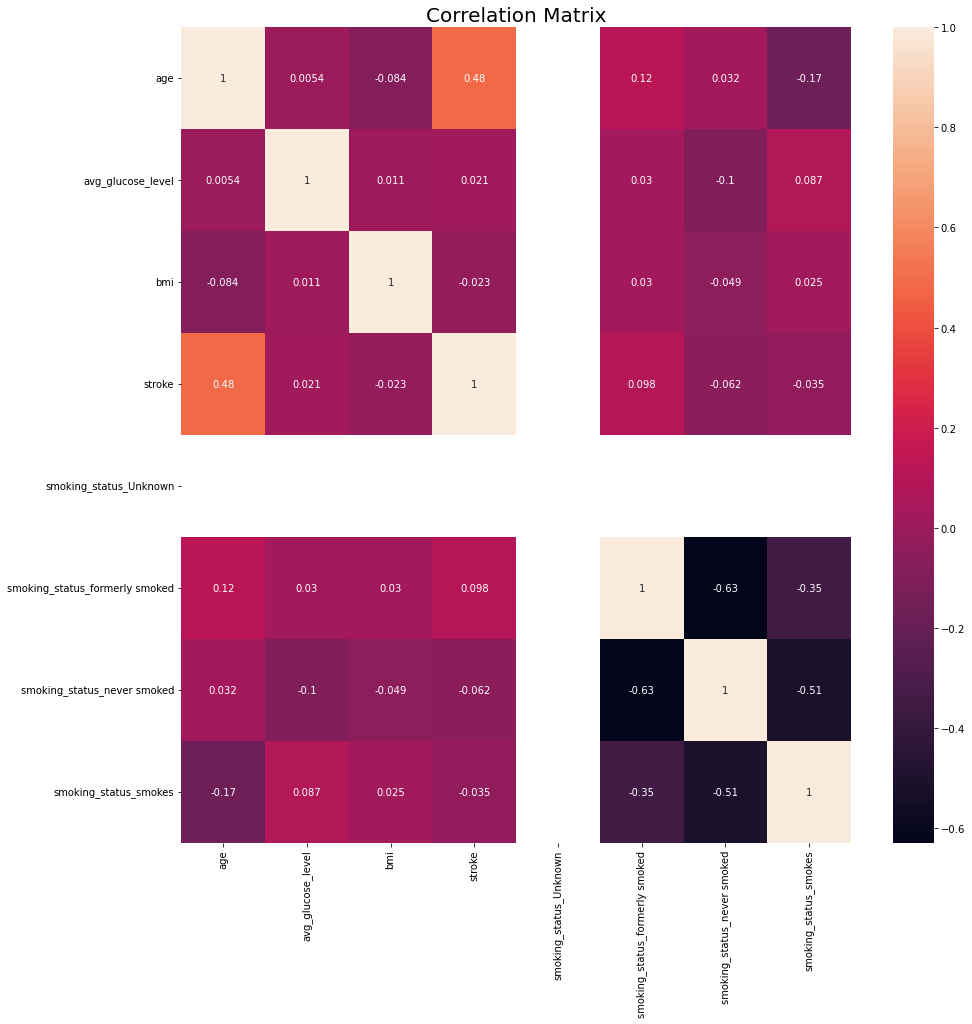

In [38]:
#Correlation of all features after label encoding
plt.figure(figsize=(15, 15))
sb.heatmap(final.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

---
# Feature Selection using correlation and Classification Models

In [39]:
#Checking for importances of all features
final.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.484584
smoking_status_formerly smoked    0.098419
avg_glucose_level                 0.020761
bmi                              -0.022931
smoking_status_smokes            -0.034684
smoking_status_never smoked      -0.061614
smoking_status_Unknown                 NaN
Name: stroke, dtype: float64

In [40]:
feature_final=final[['age','avg_glucose_level','bmi','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
target=final[["stroke"]]

<AxesSubplot:>

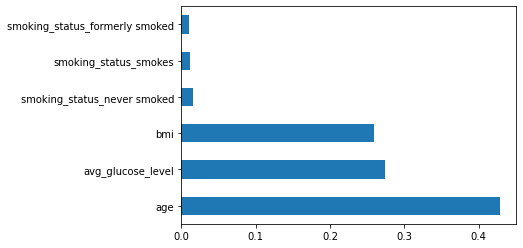

In [41]:
#Checking the importance of features using Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rf = RandomForestClassifier()
rf_model=rf.fit(feature_final,target)
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_final.columns)
feat_importances.nlargest(12).plot(kind='barh')

`avg_glucose_level`, `bmi`, `age` seems most important variables through Random Forest Classifier.

<AxesSubplot:>

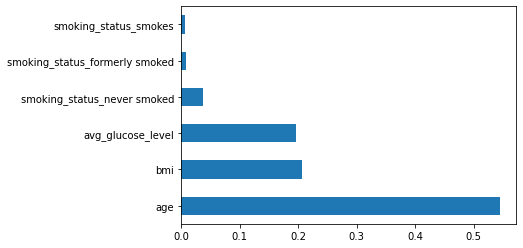

In [42]:
##Checking the importance of features using Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb_model=gb.fit(feature_final,target)
feat_importances1 = pd.Series(gb_model.feature_importances_, index=feature_final.columns)
feat_importances1.nlargest(12).plot(kind='barh')

`avg_glucose_level`, `bmi`, `age` also seems most important variables through Gradient Boosting Classifier.

---
# Prediction

In [43]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [44]:
#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train.shape

(3142, 3)

In [46]:
X_test.shape

(786, 3)

In [47]:
y_train.shape

(3142,)

In [48]:
y_test.shape

(786,)

---
# Classification Model Selection
### Logistic Regression 
(To predict categorical data results)

In [49]:
log_reg = LogisticRegression(C=0.1, max_iter=100).fit(X_train_scaled, y_train)
log_reg_pred= log_reg.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

log_reg_train_accuracy = log_reg.score(X_train_scaled,y_train)
log_reg_accuracy = log_reg.score(X_test_scaled,y_test)

pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

#print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
#print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

Training score: 0.700
Test score: 0.673


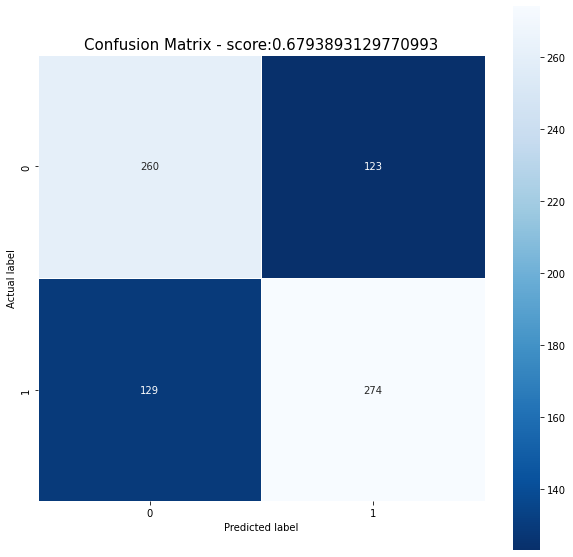

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       383
           1       0.69      0.68      0.69       403

    accuracy                           0.68       786
   macro avg       0.68      0.68      0.68       786
weighted avg       0.68      0.68      0.68       786



In [50]:
#Confusion Matrix for Logistic Regression
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train_scaled,y_train)
y_pred=log_reg_model.predict(X_test_scaled)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Gradient Boosting Classifier

In [51]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train_scaled, y_train)
gbr_pred= gbr.score(X_test_scaled, y_test)

gbr_train_accuracy =gbr.score(X_train_scaled,y_train)
gbr_accuracy = gbr.score(X_test_scaled,y_test)
pred_prob_gbr = gbr.predict_proba(X_test_scaled)


print("Training score: {:.3f}".format(gbr.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test_scaled, y_test)))

Training score: 1.000
Test score: 0.982


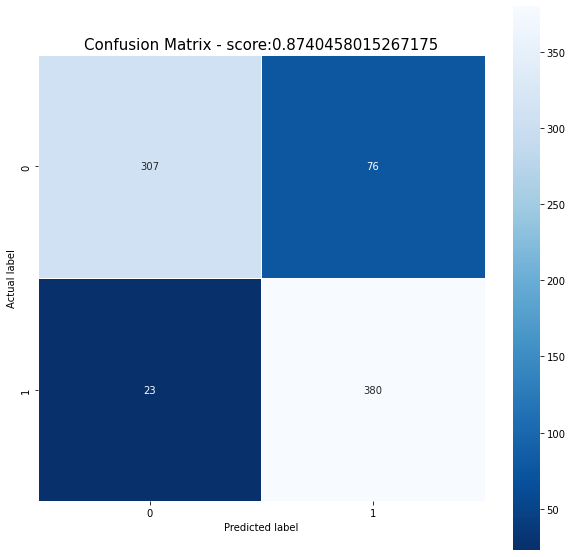

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       383
           1       0.83      0.94      0.88       403

    accuracy                           0.87       786
   macro avg       0.88      0.87      0.87       786
weighted avg       0.88      0.87      0.87       786



In [52]:
#Confusion Matrix for Gradient Boosting Classifier
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_model.fit(X_train_scaled,y_train)
y_pred=gbr_model.predict(X_test_scaled)
from sklearn import metrics

gbr_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Decision Tree Classifier

In [53]:
tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
print(tree.feature_importances_)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

[0.41436374 0.33281477 0.25282149]
Training score: 0.998
Test score: 0.966


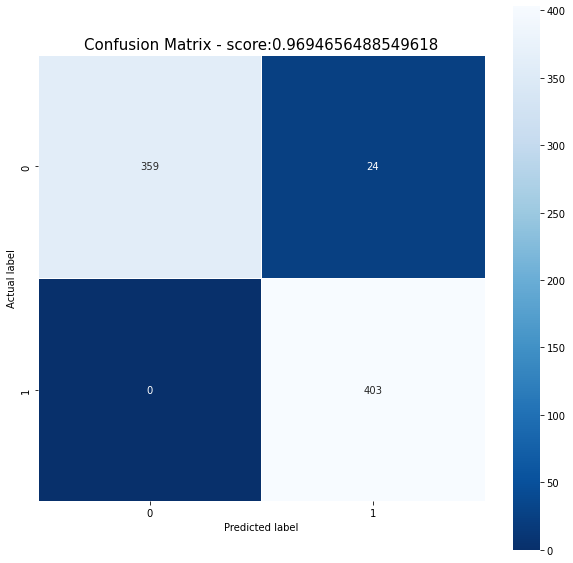

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       383
           1       0.94      1.00      0.97       403

    accuracy                           0.97       786
   macro avg       0.97      0.97      0.97       786
weighted avg       0.97      0.97      0.97       786



In [54]:
#Confusion Matrix for Decision Tree Classifier
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Random Forest Classifier

In [55]:
#max features and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting.
#max_features=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.

rf = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0).fit(X_train_scaled, y_train)
rf_pred= rf.score(X_test_scaled, y_test)


rf_train_accuracy =rf.score(X_train_scaled,y_train)
rf_accuracy = rf.score(X_test_scaled,y_test)
pred_prob_rf = rf.predict_proba(X_test_scaled)


print("Training score: {:.3f}".format(rf.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test_scaled, y_test)))

Training score: 1.000
Test score: 0.980


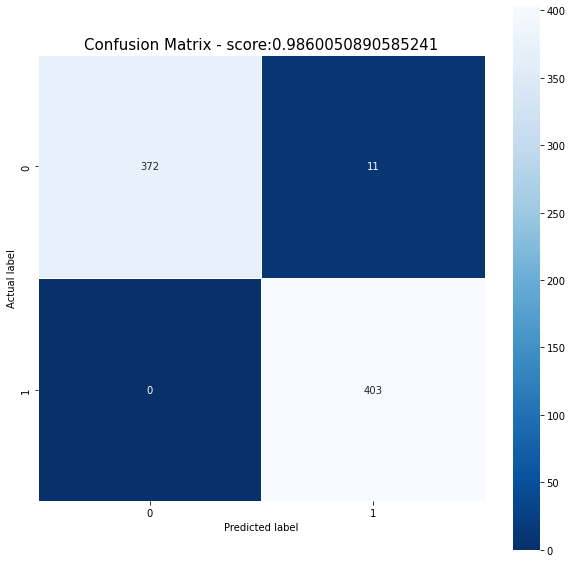

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       383
           1       0.97      1.00      0.99       403

    accuracy                           0.99       786
   macro avg       0.99      0.99      0.99       786
weighted avg       0.99      0.99      0.99       786



In [56]:
#Confusion Matrix for Random Forest Classifier
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### KNeighbours Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.934
Test score: 0.924


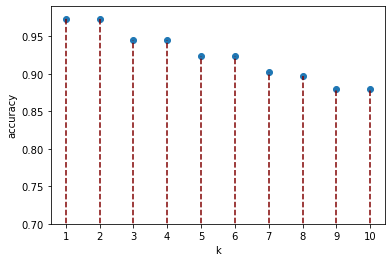

In [58]:
#Checking Optimal values of K
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

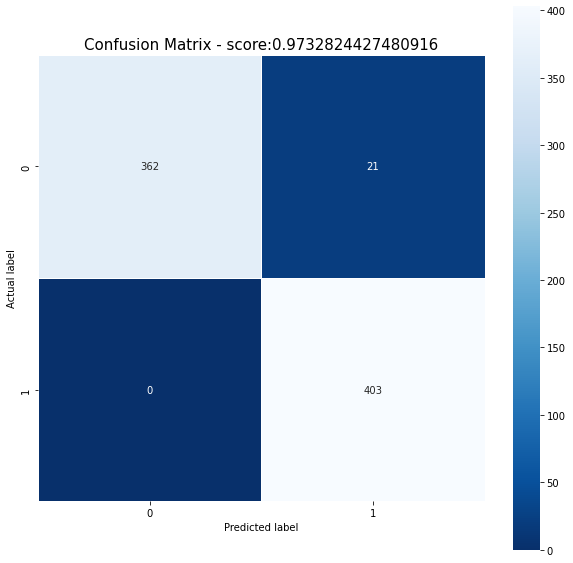

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       383
           1       0.95      1.00      0.97       403

    accuracy                           0.97       786
   macro avg       0.98      0.97      0.97       786
weighted avg       0.97      0.97      0.97       786



In [59]:
#Confusion Matrix for KNeighbours CLassifier
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

---
# Classification Model Comparison

In [60]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_tree[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_tree[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')

print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5)

0.755709463618164 1.0 0.9718883828207504 0.9647681552844527 1.0


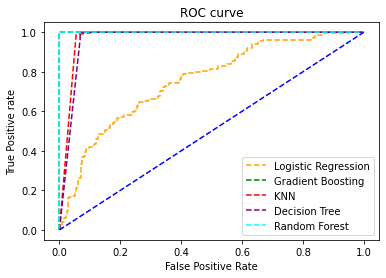

In [61]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Gradient Boosting')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The Area Under Curve is maximum for Random Forest and Gradient Boosting Classifier so they are the best classification model for prediction

In [62]:
#Comparison Table for Models
predictions_acc = { "Model": ['Logistic Regression','Gradient Boosting','KNeighbors','Decision Tree', 'Random Forest'],
"Accuracy": [log_reg_pred, gbr_pred, knn_pred, tree_pred, rf_pred]}

In [63]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.673028
1,Gradient Boosting,0.982188
2,KNeighbors,0.923664
3,Decision Tree,0.965649
4,Random Forest,0.979644


##### Comparison of Training and Testing Accuracy of all the Models

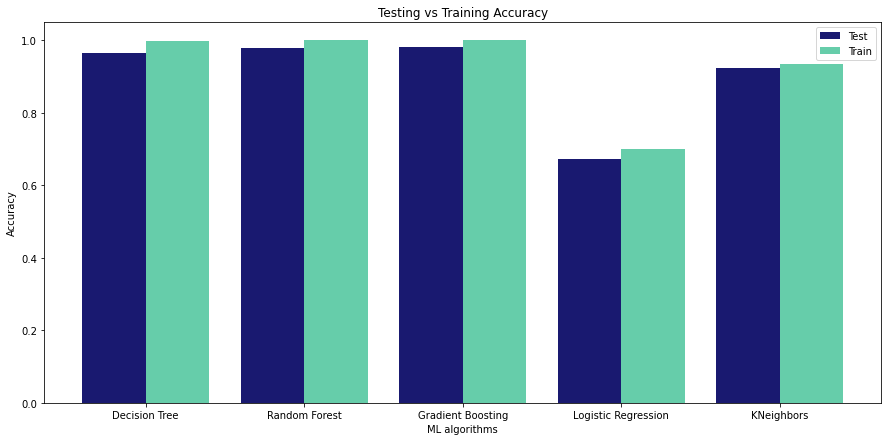

In [64]:
label = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression','KNeighbors']
Test = [tree_accuracy, rf_accuracy, gbr_accuracy, log_reg_accuracy,knn_accuracy]
Train = [tree_train_accuracy, rf_train_accuracy, gbr_train_accuracy, log_reg_train_accuracy,knn_train_accuracy]

f, ax = plt.subplots(figsize=(15,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

Train and Test accuracy for all models are nearly the same.

# Real Time Prediction and Conclusion

In [65]:
from sklearn.metrics import accuracy_score
y_test_pred = rf_model.predict(X_test_scaled)
print("Accuracy Score of Gradient Boosting:", accuracy_score(y_test,y_test_pred))


Accuracy Score of Gradient Boosting: 0.9860050890585241


In [66]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred})
output

,Real_class,Predicted_class
2413,1,1
642,0,0
1734,0,0
3464,1,1
505,0,0
...,...,...
1235,0,0
3739,1,1
2783,1,1
1063,0,0


Input: [age, avg_glucose_level, bmi]

In [67]:
qst = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
#array input of [age, avg_glucose_level, bmi] 
prediction = qst.predict_proba(np.array([[60,112,25]]))[:,1]
print("Probability of person getting a stroke is: ", prediction)
print( "Probability of person not getting a stroke is: ", 1-prediction)

Probability of person getting a stroke is:  [0.46000482]
Probability of person not getting a stroke is:  [0.53999518]


In [68]:
if prediction < 0.10:
    print("Person is at low risk of getting a stroke within next 5 years.")
if 0.10 < prediction < 0.15:
    print("Person is at medium risk of getting a stroke within next 5 years.")
if 0.15 < prediction:
    print("Person is at high risk of getting a stroke within next 5 years.")

Person is at high risk of getting a stroke within next 5 years.


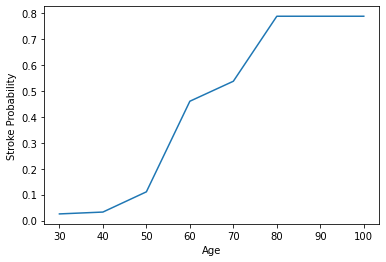

In [69]:
#Graph out age against probability of getting stroke, keeping avg_glucose and bmi to mean
start_age = 30
age_list = []
prob_list1 = [] 
while start_age <= 100: 
    age_list.append(start_age)
    prediction = qst.predict_proba(np.array([[start_age,112,25]]))[:,1]
    prob_list1.append(prediction)
    start_age += 10
plt.plot(age_list, prob_list1)
plt.xlabel('Age')
plt.ylabel('Stroke Probability')
plt.show()

From the age-stroke_probability graph above, the rate of increase in stroke probability is the highest at age 50-60.<br>
Patients becomes at mild-risk of stroke at age 45, and high-risk at 55. From this, we can conclude that the critical period to be check and tested for stroke symptoms is the age of 45 where the rate of increase in stroke probability is still relatively manageable.  

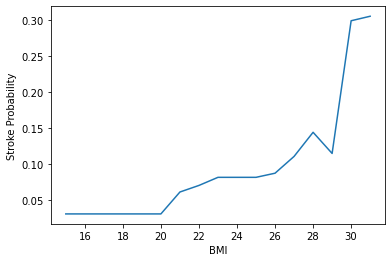

In [70]:
#Graph out bmi against probability of getting stroke, keeping avg_glucose to mean and age=45
start_bmi = 15
bmi_list = []
prob_list2 = [] 
while start_bmi <= 31: 
    bmi_list.append(start_bmi)
    prediction = qst.predict_proba(np.array([[45,112,start_bmi]]))[:,1]
    prob_list2.append(prediction)
    start_bmi += 1
plt.plot(bmi_list, prob_list2)
plt.xlabel('BMI')
plt.ylabel('Stroke Probability')
plt.show()

To maintain a low-risk stroke probability at 45, one must keep their `BMI` below 26.

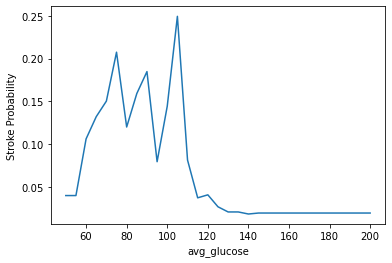

In [71]:
#Graph out avg_glucose against probability of getting stroke, keeping bmi to mean and age=45
start_agl =50
agl_list = []
prob_list3 = [] 
while start_agl <= 200: 
    agl_list.append(start_agl)
    prediction = qst.predict_proba(np.array([[45,start_agl,25]]))[:,1]
    prob_list3.append(prediction)
    start_agl += 5
plt.plot(agl_list, prob_list3)
plt.xlabel('avg_glucose')
plt.ylabel('Stroke Probability')
plt.show()

The `avg_glucose` to stroke probability graph is haphazard, no distinct trend or pattern shown to draw any reliable conclusions.